In [1]:
%matplotlib notebook
import numpy as np
from numpy.linalg import *
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
def Kmeans(k, x, max_step=1000 ):
    M,D = x.shape
    
    # initialization
    yu = np.arange( M )
    np.random.shuffle( yu )
    mu = x[ yu[:k],: ]
    old_mu = np.zeros_like( mu )
    index = np.arange( M )
    C = [1]*k
    step = 0
    
    while( step<max_step and np.abs(old_mu-mu).sum()>0 ):
        step += 1
        old_mu = mu.copy()
        dist = np.zeros( (k,M) )
        for i in range(k):
            x_mu = x - mu[i,:]
            dist[i,:] = np.diag( np.dot( x_mu , x_mu.T ) )
        yu = dist.argmin(0)

        for i in range(k):
            C[i] = index[yu==i]
            mu[i,:] = x[C[i],:].mean(0)
    
    return mu,C
    

In [3]:
patch_size = 200
key = np.array([[0.0,1.0,6.0,7.0],[3.0,9.0,4.0,10.0]])
key = np.row_stack( (key,np.random.normal(size=(8,4))) )
print(key)
std = np.array([1,1,1,1])
data =  key[:,0:1] + np.random.normal(size=(10,patch_size))*std[0]
for i in range(1,4):
    data = np.column_stack( (data , key[:,i:i+1] + np.random.normal(size=(10,patch_size))*std[i] ) )
data = data.T

label = np.array([[1,2,3,4]])
label = np.dot( label.T , np.ones( (1,patch_size) ) ).reshape(1,-1).T

[[  0.           1.           6.           7.        ]
 [  3.           9.           4.          10.        ]
 [  0.71973293  -0.40467058  -2.20483803  -0.62355639]
 [  0.20273979   0.10481934   0.98888208   0.20864792]
 [ -0.89089233   1.43842248   1.54394385  -0.84211051]
 [ -0.10355886  -0.40775383   0.40500882   0.77453455]
 [ -0.0835551    0.72992009   0.50389396   0.06989452]
 [  0.40224278   0.79827619  -0.33655941   0.44768501]
 [ -0.18823083  -1.8264867   -0.28152349  -0.54966669]
 [ -0.44182049  -0.01124913  -0.96418019  -1.42667625]]


In [4]:
mu,_ = Kmeans( 4, data )

<IPython.core.display.Javascript object>


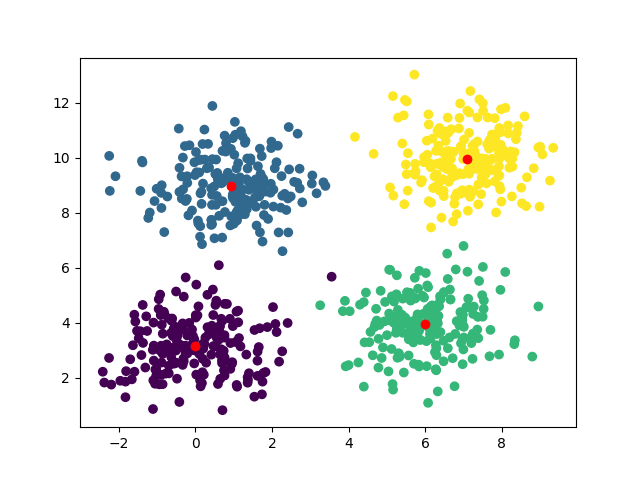

In [5]:
plt.scatter( data[:,0],data[:,1], c=label )
plt.scatter(mu[:,0],mu[:,1],c='r')
plt.ion()